<a href="https://colab.research.google.com/github/ezinneanne/mnist-task/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Construct a classifier for the MNIST dataset. Try to get more than 96% accuracy.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

#mnist

In [ ]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9672857142857143


In [6]:
# Fine-tuning hyper parameters with GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

2. Write a method to shift an image by the MNIST (right or left) by 2 pixels.

In [9]:
#a program to shift an image by 2 pixels
import numpy as np

def shift_openml_mnist_image(image_flattened, direction='right', pixels=2):
    """
    Shift a flattened MNIST image (784,) from OpenML left or right by 2 pixels.

    Parameters:
        image_flattened (numpy.ndarray): Flattened (784,) MNIST image
        direction (str): 'left' or 'right'
        pixels (int): Pixels to shift

    Returns:
        numpy.ndarray: Flattened shifted image (784,)
    """
    if image_flattened.shape != (784,):
        raise ValueError("Input image must be flattened with shape (784,)")

    # Reshape to 28x28
    img = image_flattened.reshape(28, 28)
    shifted_img = np.zeros_like(img)

    if direction == 'right':
        shifted_img[:, pixels:] = img[:, :-pixels]
    elif direction == 'left':
        shifted_img[:, :-pixels] = img[:, pixels:]
    else:
        raise ValueError("Direction must be 'left' or 'right'")

    # Flatten back to (784,)
    return shifted_img.flatten()

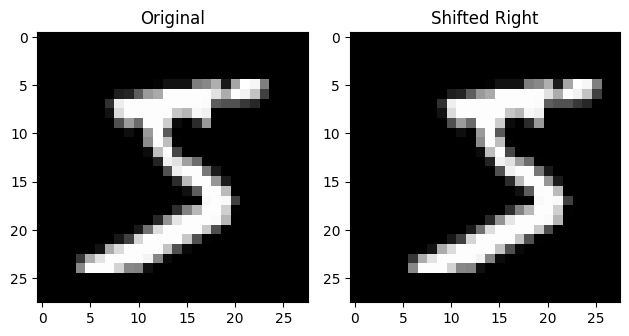

In [8]:
import matplotlib.pyplot as plt


# Select an image
original_flat = X.iloc[0].to_numpy().astype('float32')
shifted_flat = shift_openml_mnist_image(original_flat, direction='right', pixels=2)

# Visualize original and shifted images
original_img = original_flat.reshape(28, 28)
shifted_img = shifted_flat.reshape(28, 28)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Shifted Right")
plt.imshow(shifted_img, cmap='gray')

plt.tight_layout()
plt.show()